# Python profiling and Unconstrained Optimization


## Python profiling
Based on [Julien Danjou Blog post on Profiling Python using cProfile](https://julien.danjou.info/guide-to-python-profiling-cprofile-concrete-case-carbonara/) and [Matt Gormley's Lecture notes](http://www.cs.cmu.edu/~mgormley/courses/606-607-f18/slides607/lecture11-inference.pdf) **slides 61-67**.



In [4]:
import cProfile
cProfile.run('2 + 2')

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## Unconstrained optimization

Based on [Geoff Gordon's Optimization in ML lecture notes](https://qna.cs.cmu.edu/#/pages/view/99) and [Matt Gormley's Unconstrained Optimization slides](http://www.cs.cmu.edu/~mgormley/courses/606-607-f18/slides607/lecture12-opt.pdf).

Often, any ML problem is cast in terms of an optimization problem.

Example: Least square problem.

- Define objective function
- Solve unconstrained optimization problem via favorite method (closed form, GD, SGD...)
- Use learned model to predict

Review:
- Derivatives, gradient, hessian
- Convex, concave, non-convex functions
- gradient = 0, what does it correspond to?

Solving LS problem:
- random guess
- closed form solution
- gradient descent


### Gradient Descent
- Simple and often quite effective on ML tasks
- Often very scalable
- Only applies to smooth functions (differentiable)
- Might find a local minimum, rather than a global one

Algorithm:
- Choose a starting point (typically random or 0)
- While not converged, repeat:
    - compute gradient $\nabla L(w)$
    - choose a step size (fixed, line search, backtracking line search, schedule)
    - $w\leftarrow w - \eta\nabla L(w)\,.$
- Return after stopping criterion satisfied
    
An common stopping criterion is $||\nabla L(w)||_2<\epsilon$ where $\epsilon$ is a threshold picked in advance. In ML we are trying to minimize generalization loss and therefore can choose criteria such as early stopping that stops when validation error increases. Other fields might be more interested in parameter accuracy. 

### Stochastic Gradient Descent

Algorithm:
- Choose a starting point (typically random or 0)
- While not converged, repeat:
    - for each point $i$ in a reshuffled order of the points: 
        - compute gradient $\nabla L_i(w)$
        - $w\leftarrow w - \eta\nabla L_i(w)\,.$
- Return after stopping criterion satisfied
 


(442, 2)
(442,)


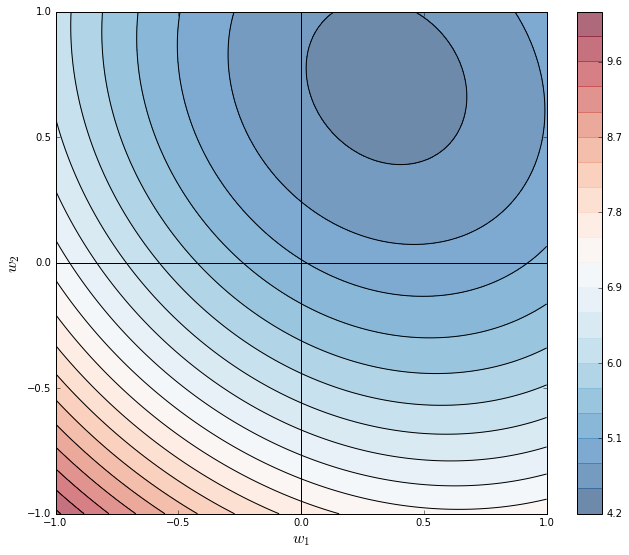

In [24]:
# Gradient Computation for Linear regression

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# X, y = datasets.load_diabetes(return_X_y=True)
data = datasets.load_diabetes()
X = data['data'][:,np.array([0,1])]
# y = data['target']
# from scipy.stats import zscore
# X = zscore(X)
# y = zscore(y)
y = X.dot(np.array([0.4,0.7]))+0.1*np.random.normal(size=442)



# compute error:
def mse(w_1,w_2):
    error = y-X.dot(np.array([w_1,w_2]))
    return np.sum(error**2)

# compute gradient:

def draw_gradient(ax,w_1,w_2):
    grad_1 = np.sum([-0.5*(y[i]-X[i:i+1].dot(np.array([w_1,w_2]))*X[i,0]) for i in range(X.shape[0])])
    grad_2 = np.sum([-0.5*(y[i]-X[i:i+1].dot(np.array([w_1,w_2]))*X[i,1]) for i in range(X.shape[0])])
    ax.quiver(w_1,w_2,grad_1, grad_2, color='k',angles='xy', scale_units='xy', scale=1,
             pivot = 'tail')
    
    

print(X.shape)
print(y.shape)

w1 = np.linspace(-1,1,100)
w2 = np.linspace(-1,1,100)
W1,W2 = np.meshgrid(w1, w2)
b = 0.5

f_W1W2 = np.zeros(W1.shape)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        f_W1W2[i,j] = mse(W1[i,j],W2[i,j])
    
# w1 = np.linspace(-1,1,10000)
# w2_plot = np.nan_to_num(np.sqrt(b - w1**2))


plt.figure(figsize=(11,9))

cs = plt.contourf(W1, W2, f_W1W2,20,cmap='RdBu_r',alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')

# w1 = np.linspace(-1,1,10)
# w2 = np.linspace(-1,1,10)
# W1,W2 = np.meshgrid(w1, w2)
# for i in range(W1.shape[0]):
#     for j in range(W1.shape[1]):
#         draw_gradient(plt,W1[i,j],W2[i,j])
# plt.clabel(contours, inline=True, fontsize=14)
plt.xlabel('$w_1$', fontsize=16)
plt.ylabel('$w_2$', fontsize=16)
# plt.plot(w1[w2_plot>0],w2_plot[w2_plot>0], linewidth=5,color='r')
# plt.plot(w1[w2_plot>0],-w2_plot[w2_plot>0], linewidth=5,color='r')

plt.axhline(0, color='k')
plt.axvline(0, color='k')


In [6]:
X[i:i+1].dot(np.array([2,3]))

array([ 0.22819217])